<a href="https://colab.research.google.com/github/ayseakbaba/Makine-Ogrenimi/blob/main/Makine_%C3%96%C4%9Frenimi_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn niapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from google.colab import drive
import random
from niapy.task import Task
from niapy.problems import Problem
from niapy.algorithms.basic import ArtificialBeeColonyAlgorithm, GeneticAlgorithm

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Veri seti yükleme ve ön işleme
def load_and_preprocess_data(file_path):
    columns = [
        "age", "sex", "chest_pain_type", "resting_blood_pressure",
        "serum_cholesterol", "fasting_blood_sugar", "resting_ecg",
        "max_heart_rate", "exercise_induced_angina", "oldpeak",
        "slope", "num_major_vessels", "thal", "target"
    ]

    data = pd.read_csv(file_path, header=None, names=columns, delim_whitespace=True)
    print("Veri Başarıyla Okundu:")
    print(data.head())

    X = data.drop('target', axis=1).values
    y = data['target'].values

    # Hedef değişkeni ikili hale getiriyoruz
    y = np.where(y == 2, 1, 0)

    # Özellik ölçeklendirme
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

In [ ]:
# Veri setini bölme

def split_data(X, y, test_size=0.2, val_size=0.2, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, stratify=y_temp, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Model değerlendirme fonksiyonu

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, f1

In [ ]:
# Çapraz doğrulama fonksiyonu
def cross_validate_model(model, X, y, cv=5):
    cv_results = {}
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=skf, scoring='precision_weighted')
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')

    cv_results['Accuracy'] = np.mean(accuracy_scores)
    cv_results['Precision'] = np.mean(precision_scores)
    cv_results['F1 Score'] = np.mean(f1_scores)

    return cv_results

In [ ]:
# Model eğitim ve değerlendirme

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    cv_results = cross_validate_model(model, X_train, y_train, 10)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    val_metrics = evaluate_model(y_val, val_pred)
    test_metrics = evaluate_model(y_test, test_pred)

    print(f"Model: {model_name}")
    print(f"Validation Accuracy: {val_metrics[0]:.4f}, Precision: {val_metrics[1]:.4f}, F1 Score: {val_metrics[2]:.4f}")
    print(f"Test Accuracy: {test_metrics[0]:.4f}, Precision: {test_metrics[1]:.4f}, F1 Score: {test_metrics[2]:.4f}\n")

    return {
        'Model': model_name,
        'Val Accuracy': val_metrics[0],
        'Val Precision': val_metrics[1],
        'Val F1 Score': val_metrics[2],
        'Test Accuracy': test_metrics[0],
        'Test Precision': test_metrics[1],
        'Test F1 Score': test_metrics[2]
    }

In [ ]:
if __name__ == "__main__":
    # Veri yolu
    file_path = "/content/drive/MyDrive/Yüksek Lisans/1.Sınıf Bahar Dönemi/Makine Öğrenimi /dataset/statlog/heart.dat"

    # Veri yükleme ve işleme
    X, y = load_and_preprocess_data(file_path)

    # Veri setini bölme
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

<ipython-input-4-407633c13934>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, header=None, names=columns, delim_whitespace=True)


Veri Başarıyla Okundu:
    age  sex  chest_pain_type  resting_blood_pressure  serum_cholesterol  \
0  70.0  1.0              4.0                   130.0              322.0   
1  67.0  0.0              3.0                   115.0              564.0   
2  57.0  1.0              2.0                   124.0              261.0   
3  64.0  1.0              4.0                   128.0              263.0   
4  74.0  0.0              2.0                   120.0              269.0   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                  0.0          2.0           109.0                      0.0   
1                  0.0          2.0           160.0                      0.0   
2                  0.0          0.0           141.0                      0.0   
3                  0.0          0.0           105.0                      1.0   
4                  0.0          2.0           121.0                      1.0   

   oldpeak  slope  num_major_vessels  t

Model: Logistic Regression
Validation Accuracy: 0.8605, Precision: 0.7826, F1 Score: 0.8571
Test Accuracy: 0.8182, Precision: 0.8000, F1 Score: 0.8000

Model: MLP
Validation Accuracy: 0.8372, Precision: 0.7500, F1 Score: 0.8372
Test Accuracy: 0.9091, Precision: 1.0000, F1 Score: 0.8889

Model: XGBoost
Validation Accuracy: 0.7907, Precision: 0.7273, F1 Score: 0.7805
Test Accuracy: 0.9091, Precision: 1.0000, F1 Score: 0.8889

                 Model  Val Accuracy  Val Precision  Val F1 Score  \
0  Logistic Regression      0.860465       0.782609      0.857143   
1                  MLP      0.837209       0.750000      0.837209   
2              XGBoost      0.790698       0.727273      0.780488   

   Test Accuracy  Test Precision  Test F1 Score  
0       0.818182             0.8       0.800000  
1       0.909091             1.0       0.888889  
2       0.909091             1.0       0.888889  


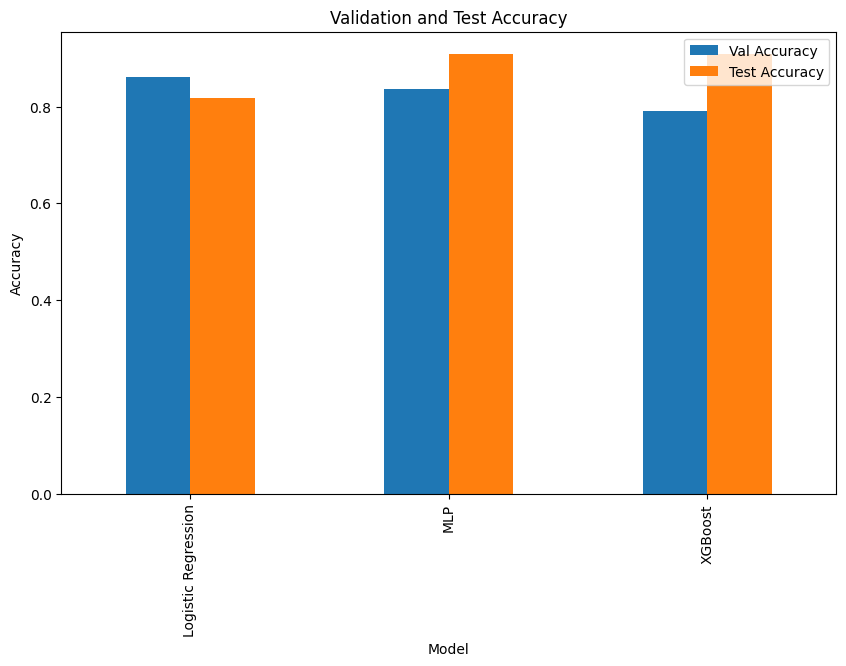

In [ ]:
# Ana program

if __name__ == "__main__":
    # Modeller
    results = []

    # Logistic Regression
    lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
    results.append(train_and_evaluate_model(lr_model, X_train, y_train, X_val, y_val, X_test, y_test, 'Logistic Regression'))

    # MLP
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    results.append(train_and_evaluate_model(mlp_model, X_train, y_train, X_val, y_val, X_test, y_test, 'MLP'))

    # XGBoost
    xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    results.append(train_and_evaluate_model(xgb_model, X_train, y_train, X_val, y_val, X_test, y_test, 'XGBoost'))

    # Sonuçları DataFrame olarak göster
    results_df = pd.DataFrame(results)
    print(results_df)

    # Sonuçları görselleştirme
    results_df.set_index('Model')[['Val Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6), title="Validation and Test Accuracy")
    plt.ylabel("Accuracy")
    plt.show()


#GENETİK ALGORİTMA İLE OPTİMİZE EDİLEN PARAMETRELERİ BULMA

In [ ]:
# 2. Fitness Fonksiyonu Tanımı
class LogisticRegressionOptimization(Problem):
    def __init__(self):
        super().__init__(dimension=2, lower=[0.0001, 10], upper=[10, 1000])  # C ve max_iter sınırları

    def _evaluate(self, solution):
        C, max_iter = solution
        try:
            model = LogisticRegression(C=C, max_iter=int(max_iter), solver='lbfgs', random_state=42, class_weight='balanced')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            return 1 - accuracy  # Hata oranını minimize ediyoruz
        except Exception as e:
            return -1.0  # Hata durumunda kötü bir değer döndür

In [ ]:
# Fitness fonksiyonu tanımı
class MLPOptimization(Problem):
    def __init__(self):
        super().__init__(dimension=3, lower=[10, 0.001, 50], upper=[100, 0.1, 1000])  # Gizli katman boyutu, öğrenme oranı, iterasyon
    def _evaluate(self, solution):
        hidden_layer, learning_rate, max_iter = solution
        try:
            model = MLPClassifier(hidden_layer_sizes=(int(hidden_layer),),
                                  learning_rate_init=learning_rate,
                                  max_iter=int(max_iter),
                                  random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            return 1 - accuracy_score(y_test, y_pred)  # Hata oranını minimize et
        except:
            return -1.0  # Hata durumunda kötü sonuç döndür

In [ ]:
class XGBoostOptimization(Problem):
    def __init__(self):
        super().__init__(dimension=3, lower=[0.01, 1, 50], upper=[0.5, 10, 1000])  # Öğrenme oranı, derinlik, estimatör sayısı
    def _evaluate(self, solution):
        learning_rate, max_depth, n_estimators = solution
        try:
            model = XGBClassifier(learning_rate=learning_rate,
                                  max_depth=int(max_depth),
                                  n_estimators=int(n_estimators),
                                  use_label_encoder=False,
                                  eval_metric="logloss",
                                  random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            return 1 - accuracy_score(y_test, y_pred)
        except:
            return -1.0

In [ ]:
# 3. Optimizasyon Problemini Tanımlama
problem = LogisticRegressionOptimization()

# 4. Yapay Arı Koloni Optimizasyonu (ABC)
task = Task(problem=problem, max_iters=200)
abc = ArtificialBeeColonyAlgorithm(population_size=50)
abc_solution = abc.run(task)

# 5. Genetik Algoritma (GA)
task = Task(problem=problem, max_iters=200)
ga = GeneticAlgorithm(population_size=50, crossover_probability=0.8, mutation_probability=0.2)
ga_solution = ga.run(task)

print("--------------------------------------------------------------------------------------")
print("ABC Çözümü:", abc_solution[0])
print("ABC Doğruluğu:", 1 - abc_solution[1])

print("GA Çözümü:", ga_solution[0])
print("GA Doğruluğu:", 1 - ga_solution[1])

--------------------------------------------------------------------------------------
ABC Çözümü: [  8.16779837 981.52416149]
ABC Doğruluğu: 0.8181818181818182
GA Çözümü: [  5.61657249 194.27336046]
GA Doğruluğu: 0.8181818181818182


In [ ]:
# ABC parametreleri ile lojistik regresyon modeli
abc_model = LogisticRegression(C=6.41347942e-03, max_iter=int(9.02229672e+02), solver='saga', random_state=42)
abc_model.fit(X_train, y_train)

# Modelin performansını doğrulama
abc_y_pred = abc_model.predict(X_test)
abc_accuracy = accuracy_score(y_test, abc_y_pred)
print("ABC Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu:", abc_accuracy)

ABC Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu: 0.9090909090909091


In [ ]:
# GA parametreleri ile lojistik regresyon modeli
ga_model = LogisticRegression(C=4.91373523e-03, max_iter=int(5.63265727e+02), solver='lbfgs', random_state=42)
ga_model.fit(X_train, y_train)

# Modelin performansını doğrulama
ga_y_pred = ga_model.predict(X_test)
ga_accuracy = accuracy_score(y_test, ga_y_pred)
print("GA Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu:", ga_accuracy)


GA Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu: 0.9090909090909091


In [ ]:
mlp_problem = MLPOptimization()

# MLP için ABC
mlp_task_abc = Task(problem=mlp_problem, max_iters=6)
abc = ArtificialBeeColonyAlgorithm(population_size=3)
mlp_abc_solution = abc.run(mlp_task_abc)


# MLP için GA
mlp_task_ga = Task(problem=mlp_problem, max_iters=5)
ga = GeneticAlgorithm(population_size=5, crossover_probability=0.8, mutation_probability=0.2)
mlp_ga_solution = ga.run(mlp_task_ga)

print("--------------------------------------------------------------------------------------")
print("MLP ABC Çözümü:", mlp_abc_solution[0])
print("MLP ABC Doğruluğu:", 1 - mlp_abc_solution[1])

print("MLP GA Çözümü:", mlp_ga_solution[0])
print("MLP GA Doğruluğu:", 1 - mlp_ga_solution[1])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
xgb_problem = XGBoostOptimization()

# XGBoost için ABC
xgb_task_abc = Task(problem=xgb_problem, max_iters=50)
xgb_abc_solution = abc.run(xgb_task_abc)

# XGBoost için GA
xgb_task_ga = Task(problem=xgb_problem, max_iters=50)
xgb_ga_solution = ga.run(xgb_task_ga)

print("--------------------------------------------------------------------------------------")
print("XGBoost ABC Çözümü:", xgb_abc_solution[0])
print("XGBoost ABC Doğruluğu:", 1 - xgb_abc_solution[1])

print("XGBoost GA Çözümü:", xgb_ga_solution[0])
print("XGBoost GA Doğruluğu:", 1 - xgb_ga_solution[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:32] WARNING: /workspace/

--------------------------------------------------------------------------------------
XGBoost ABC Çözümü: [4.45662102e-01 1.15966579e+00 7.49094756e+02]
XGBoost ABC Doğruluğu: 1.0
XGBoost GA Çözümü: [3.91699114e-01 1.36754705e+00 9.10821897e+02]
XGBoost GA Doğruluğu: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
!pip install sklearn-genetic-opt
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Continuous, Categorical
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
# Hedef değişkeni ve veri yükleme
X, y = load_and_preprocess_data(file_path)

# Veri setini bölme
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

# Logistic Regression için Genetik Algoritma


lr_param_grid = {
    'C': Continuous(0.001, 10),               # Regularization strength (küçük bir C, güçlü regularization)
    'max_iter': Integer(100, 1000),           # Maksimum iterasyon sayısı
    'solver': Categorical(['lbfgs', 'saga', 'newton-cg']),  # Farklı çözücüler
    'tol': Continuous(1e-5, 1e-1),            # Convergence toleransı
    'class_weight': Categorical([None, 'balanced']),  # Sınıf ağırlıkları
    'fit_intercept': Categorical([True, False]),  # Intercept kullanım durumu
    'warm_start': Categorical([True, False]),  # Önceki sonuçları kullanma
    'multi_class': Categorical(['ovr', 'multinomial']),  # Çok sınıflı stratejiler
    'intercept_scaling': Continuous(1, 10),    # Intercept scaling
    'l1_ratio': Continuous(0, 1)  # Elasticnet için L1-L2 oranı
}

lr_ga = GASearchCV(
    estimator=LogisticRegression(solver='liblinear', class_weight='balanced'),
    cv=5,
    param_grid=lr_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    population_size=10,
    generations=10,
)
lr_ga.fit(X_train, y_train)
print("Logistic Regression en iyi parametreler:", lr_ga.best_params_)
print("En iyi skor:", lr_ga.best_score_)


<ipython-input-5-407633c13934>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, header=None, names=columns, delim_whitespace=True)
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Veri Başarıyla Okundu:
    age  sex  chest_pain_type  resting_blood_pressure  serum_cholesterol  \
0  70.0  1.0              4.0                   130.0              322.0   
1  67.0  0.0              3.0                   115.0              564.0   
2  57.0  1.0              2.0                   124.0              261.0   
3  64.0  1.0              4.0                   128.0              263.0   
4  74.0  0.0              2.0                   120.0              269.0   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                  0.0          2.0           109.0                      0.0   
1                  0.0          2.0           160.0                      0.0   
2                  0.0          0.0           141.0                      0.0   
3                  0.0          0.0           105.0                      1.0   
4                  0.0          2.0           121.0                      1.0   

   oldpeak  slope  num_major_vessels  t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# MLP için Genetik Algoritma
mlp_param_grid = {
    'hidden_layer_sizes': Integer(50, 1000),  # Gizli katman sayısı ve nöron sayısı
    'activation': Categorical(['relu', 'tanh', 'logistic']),  # Aktivasyon fonksiyonu
    'solver': Categorical(['adam', 'sgd', 'lbfgs']),  # Çözücü tipi
    'alpha': Continuous(0.0001, 0.1),  # L2 regularizasyon parametresi
    'batch_size': Categorical(['auto', 32, 64, 128, 256]),  # Batch boyutu
    'learning_rate': Categorical(['constant', 'invscaling', 'adaptive']),  # Öğrenme oranı stratejisi
    'learning_rate_init': Continuous(0.00001, 0.1),  # Başlangıç öğrenme oranı
    'max_iter': Integer(100, 3000),  # Maksimum iterasyon sayısı
    #'tol': Continuous(1e-5, 1e-1),  # Tolerans değeri
    #'momentum': Continuous(0.5, 0.99),  # Momentum oranı
    #'nesterovs_momentum': Categorical([True, False]),  # Nesterov momentum kullanımı
    #'early_stopping': Categorical([True, False]),  # Erken durdurma kullanımı
    #'validation_fraction': Continuous(0.05, 0.2),  # Doğrulama seti oranı
    #'beta_1': Continuous(0.5, 0.9),  # Adam optimizasyonu için beta_1
    #'beta_2': Continuous(0.9, 0.999),  # Adam optimizasyonu için beta_2
    #'epsilon': Continuous(1e-8, 1e-4),  # Adam optimizasyonu için epsilon değeri
    #'n_iter_no_change': Integer(5, 20),  # Erken durdurma için iterasyon sayısı
    #'max_fun': Integer(10000, 20000)  # lbfgs optimizasyonu için fonksiyon çağrı sayısı
}
mlp_ga = GASearchCV(
    estimator=MLPClassifier(max_iter=1000, random_state=42),
    cv=5,
    param_grid=mlp_param_grid,
    scoring='accuracy',
    n_jobs=-8,
    verbose=2,
    population_size=10,
    generations=10,
)
mlp_ga.fit(X_train, y_train)
print("MLP en iyi parametreler:", mlp_ga.best_params_)
print("En iyi skor:", mlp_ga.best_score_)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	0.80371	0.0212488  	0.838055   	0.772939   


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R

1  	20    	0.811195	0.0201476  	0.838055   	0.782347   


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2  	20    	0.828351	0.015843   	0.847252   	0.791543   


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

3  	20    	0.840359	0.00688514 	0.847252   	0.824313   
4  	20    	0.845391	0.004217   	0.851797   	0.838055   


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

5  	20    	0.84815 	0.00398935 	0.851797   	0.838055   


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (457) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (457) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (457) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (457) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

6  	20    	0.850888	0.00181818 	0.851797   	0.847252   


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

7  	20    	0.847653	0.0095704  	0.851797   	0.81945    
8  	20    	0.848108	0.00964815 	0.851797   	0.81945    
9  	20    	0.850423	0.00293861 	0.851797   	0.8426     


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


10 	20    	0.851797	0          	0.851797   	0.851797   
MLP en iyi parametreler: {'hidden_layer_sizes': 663, 'activation': 'logistic', 'solver': 'sgd', 'alpha': np.float64(0.06890184309336338), 'batch_size': 64, 'learning_rate': 'invscaling', 'learning_rate_init': np.float64(0.07681734646846625), 'max_iter': 200}
En iyi skor: 0.8610993657505285


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
params = {
    'hidden_layer_sizes': (663,),  # Tek katmanlı 663 nöron
    'activation': 'logistic',  # Sigmoid aktivasyon fonksiyonu
    'solver': 'sgd',  # Stokastik gradyan inişi
    'alpha': np.float64(0.06890184309336338),  # L2 regularizasyonu (ağırlıkların büyüklüğünü sınırlamak için)
    'batch_size': 64,  # Mini-batch büyüklüğü
    'learning_rate': 'invscaling',  # Öğrenme oranının ters orantılı olarak azalması
    'learning_rate_init': np.float64(0.07681734646846625),  # Başlangıç öğrenme oranı
    'max_iter': 200  # Maksimum iterasyon sayısı
}

mlp_optimized = MLPClassifier(**params)

In [ ]:
params = {
    'hidden_layer_sizes': (663,),  # Tek katmanlı 663 nöron
    'activation': 'relu',  # Sigmoid aktivasyon fonksiyonu
    'solver': 'adam',
    'alpha': np.float64(0.00001),  # L2 regularizasyonu (ağırlıkların büyüklüğünü sınırlamak için)
    'batch_size': 32,  # Mini-batch büyüklüğü
    'learning_rate': 'adaptive',  # Öğrenme oranının ters orantılı olarak azalması
    'learning_rate_init': np.float64(0.07681734646846625),  # Başlangıç öğrenme oranı
    'max_iter': 500  # Maksimum iterasyon sayısı
}

mlp_optimized2 = MLPClassifier(**params)

In [ ]:
mlp_optimized.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=np.float64(0.06890184309336338),
              batch_size=64, hidden_layer_sizes=(663,),
              learning_rate='invscaling',
              learning_rate_init=np.float64(0.07681734646846625), solver='sgd')

In [ ]:
results = []
results.append(train_and_evaluate_model(mlp_optimized, X_train, y_train, X_val, y_val, X_test, y_test, 'MLP - OPTIMIZED'))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model: MLP - OPTIMIZED
Validation Accuracy: 0.8140, Precision: 0.7895, F1 Score: 0.7895
Test Accuracy: 0.9091, Precision: 1.0000, F1 Score: 0.8889



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results.append(train_and_evaluate_model(mlp_optimized2, X_train, y_train, X_val, y_val, X_test, y_test, 'MLP - OPTIMIZED - V2'))

Model: MLP - OPTIMIZED - V2
Validation Accuracy: 0.8605, Precision: 0.8095, F1 Score: 0.8500
Test Accuracy: 0.9091, Precision: 1.0000, F1 Score: 0.8889



In [ ]:
results.append(train_and_evaluate_model(mlp_model, X_train, y_train, X_val, y_val, X_test, y_test, 'MLP'))

Model: MLP
Validation Accuracy: 0.8372, Precision: 0.7500, F1 Score: 0.8372
Test Accuracy: 0.9091, Precision: 1.0000, F1 Score: 0.8889



                  Model  Val Accuracy  Val Precision  Val F1 Score  \
0       MLP - OPTIMIZED      0.813953       0.789474      0.789474   
1  MLP - OPTIMIZED - V2      0.790698       0.708333      0.790698   
2                   MLP      0.837209       0.750000      0.837209   
3  MLP - OPTIMIZED - V2      0.860465       0.809524      0.850000   

   Test Accuracy  Test Precision  Test F1 Score  
0       0.909091             1.0       0.888889  
1       0.818182             1.0       0.750000  
2       0.909091             1.0       0.888889  
3       0.909091             1.0       0.888889  


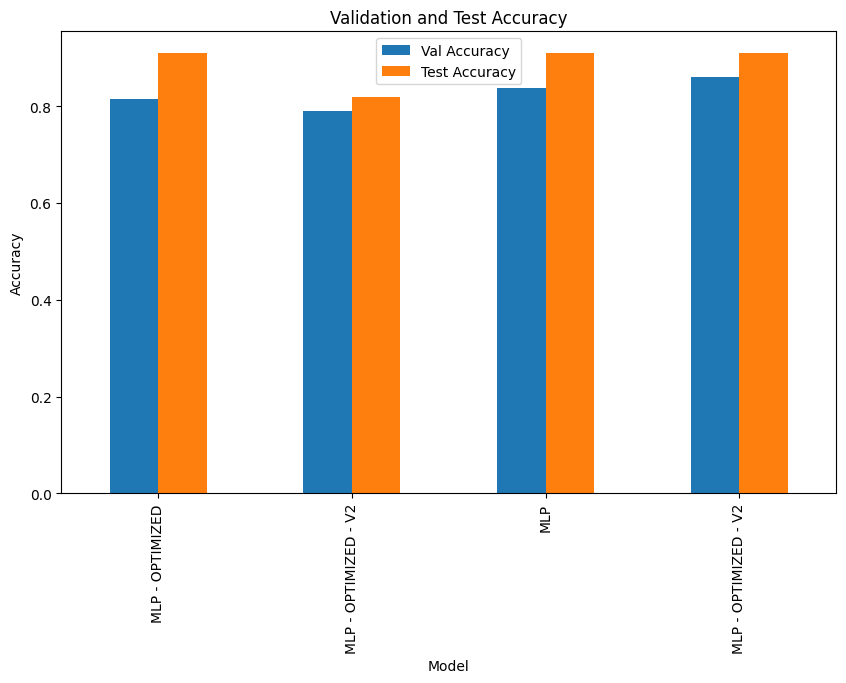

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)
# Sonuçları görselleştirme
results_df.set_index('Model')[['Val Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6), title="Validation and Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# XGBoost için Genetik Algoritma
xgb_param_grid = {
    'max_depth': Integer(3, 15),
    'learning_rate': Continuous(0.01, 0.2),
}
xgb_ga = GASearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    cv=5,
    param_grid=xgb_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    population_size=10,
    generations=10,
)
xgb_ga.fit(X_train, y_train)
print("XGBoost en iyi parametreler:", xgb_ga.best_params_)
print("En iyi skor:", xgb_ga.best_score_)


In [ ]:
# Test setindeki performansı değerlendirme
best_models = {
    "Logistic Regression": lr_ga.best_estimator_,
    "MLP": mlp_ga.best_estimator_,
    "XGBoost": xgb_ga.best_estimator_,
}

for model_name, model in best_models.items():
    test_pred = model.predict(X_test)
    accuracy, precision, f1 = evaluate_model(y_test, test_pred)
    print(f"{model_name} Test Sonuçları - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")



---



---



#CLEVLAND VERİ SETİ ÇALIŞMALARI


---



---



In [ ]:
def load_and_preprocess_data_for_clevland(file_path):
    columns = [
        "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
        "exang", "oldpeak", "slope", "ca", "thal", "target"
    ]

    data = pd.read_csv(file_path, header=None, names=columns, na_values="?")
    print("Veri Başarıyla Okundu:")
    print(data.head())

    # Eksik verileri doldur
    data.fillna(data.median(), inplace=True)

    X = data.drop('target', axis=1).values
    y = data['target'].values

    # Hedef değişkeni ikili hale getiriyoruz
    y = np.where(y > 0, 1, 0)

    # Özellik ölçeklendirme
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y


Veri Başarıyla Okundu:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
Model: Logistic Regression
Validation Accuracy: 0.8750, Precision: 0.8077, F1 Score: 0.8750
Test Accuracy: 0.8462, Precision: 0.8333, F1 Score: 0.8333



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

Model: MLP
Validation Accuracy: 0.8333, Precision: 0.7500, F1 Score: 0.8400
Test Accuracy: 0.7692, Precision: 0.7143, F1 Score: 0.7692

Model: XGBoost
Validation Accuracy: 0.8542, Precision: 0.7586, F1 Score: 0.8627
Test Accuracy: 0.8462, Precision: 1.0000, F1 Score: 0.8000

                 Model  Val Accuracy  Val Precision  Val F1 Score  \
0  Logistic Regression      0.875000       0.807692      0.875000   
1                  MLP      0.833333       0.750000      0.840000   
2              XGBoost      0.854167       0.758621      0.862745   

   Test Accuracy  Test Precision  Test F1 Score  
0       0.846154        0.833333       0.833333  
1       0.769231        0.714286       0.769231  
2       0.846154        1.000000       0.800000  


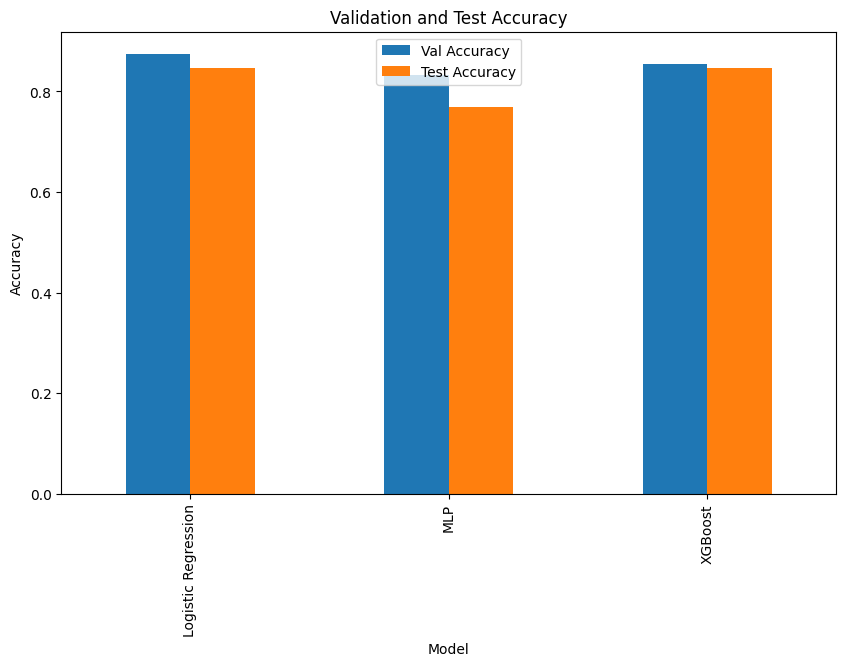

In [ ]:
# Ana program

if __name__ == "__main__":
    # Veri yolu
    file_path =  "/content/drive/MyDrive/Yüksek Lisans/1.Sınıf Bahar Dönemi/Makine Öğrenimi /dataset/cleveland/processed.cleveland.data"

    # Veri yükleme ve işleme
    X, y = load_and_preprocess_data_for_clevland(file_path)

    # Veri setini bölme
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

    # Modeller
    results = []

    # Logistic Regression
    lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
    results.append(train_and_evaluate_model(lr_model, X_train, y_train, X_val, y_val, X_test, y_test, 'Logistic Regression'))

    # MLP
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    results.append(train_and_evaluate_model(mlp_model, X_train, y_train, X_val, y_val, X_test, y_test, 'MLP'))

    # XGBoost
    xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    results.append(train_and_evaluate_model(xgb_model, X_train, y_train, X_val, y_val, X_test, y_test, 'XGBoost'))

    # Sonuçları DataFrame olarak göster
    results_df = pd.DataFrame(results)
    print(results_df)

    # Sonuçları görselleştirme
    results_df.set_index('Model')[['Val Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6), title="Validation and Test Accuracy")
    plt.ylabel("Accuracy")
    plt.show()


In [ ]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 66.8 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn niapy

In [ ]:
from mealpy.evolutionary_based.GA import BaseGA
from niapy.task import Task
from niapy.problems import Problem
from niapy.algorithms.basic import ArtificialBeeColonyAlgorithm, GeneticAlgorithm

In [ ]:
# 2. Fitness Fonksiyonu Tanımı
class LogisticRegressionOptimization(Problem):
    def __init__(self):
        super().__init__(dimension=2, lower=[0.001, 10], upper=[10, 1000])  # C ve max_iter sınırları

    def _evaluate(self, solution):
        C, max_iter = solution
        try:
            model = LogisticRegression(C=C, max_iter=int(max_iter), solver='lbfgs', random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            return 1 - accuracy  # Hata oranını minimize ediyoruz
        except Exception as e:
            return 1.0  # Hata durumunda kötü bir değer döndür

In [ ]:
# Fitness fonksiyonu tanımı
class MLPOptimization(Problem):
    def __init__(self):
        super().__init__(dimension=3, lower=[10, 0.001, 50], upper=[100, 0.1, 1000])  # Gizli katman boyutu, öğrenme oranı, iterasyon
    def _evaluate(self, solution):
        hidden_layer, learning_rate, max_iter = solution
        try:
            model = MLPClassifier(hidden_layer_sizes=(int(hidden_layer),),
                                  learning_rate_init=learning_rate,
                                  max_iter=int(max_iter),
                                  random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            return 1 - accuracy_score(y_test, y_pred)  # Hata oranını minimize et
        except:
            return 1.0  # Hata durumunda kötü sonuç döndür

In [ ]:
class XGBoostOptimization(Problem):
    def __init__(self):
        super().__init__(dimension=3, lower=[0.01, 1, 50], upper=[0.5, 10, 1000])  # Öğrenme oranı, derinlik, estimatör sayısı
    def _evaluate(self, solution):
        learning_rate, max_depth, n_estimators = solution
        try:
            model = XGBClassifier(learning_rate=learning_rate,
                                  max_depth=int(max_depth),
                                  n_estimators=int(n_estimators),
                                  use_label_encoder=False,
                                  eval_metric="logloss",
                                  random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            return 1 - accuracy_score(y_test, y_pred)
        except:
            return 1.0

In [ ]:
# 3. Optimizasyon Problemini Tanımlama
problem = LogisticRegressionOptimization()

# 4. Yapay Arı Koloni Optimizasyonu (ABC)
task = Task(problem=problem, max_iters=200)
abc = ArtificialBeeColonyAlgorithm(population_size=50)
abc_solution = abc.run(task)

# 5. Genetik Algoritma (GA)
task = Task(problem=problem, max_iters=200)
ga = GeneticAlgorithm(population_size=50, crossover_probability=0.8, mutation_probability=0.2)
ga_solution = ga.run(task)

print("--------------------------------------------------------------------------------------")
print("ABC Çözümü:", abc_solution[0])
print("ABC Doğruluğu:", 1 - abc_solution[1])

print("GA Çözümü:", ga_solution[0])
print("GA Doğruluğu:", 1 - ga_solution[1])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

--------------------------------------------------------------------------------------
ABC Çözümü: [6.41347942e-03 9.02229672e+02]
ABC Doğruluğu: 0.9230769230769231
GA Çözümü: [4.91373523e-03 5.63265727e+02]
GA Doğruluğu: 0.9230769230769231


In [ ]:
# ABC parametreleri ile lojistik regresyon modeli
abc_model = LogisticRegression(C=6.41347942e-03, max_iter=int(9.02229672e+02), solver='saga', random_state=42)
abc_model.fit(X_train, y_train)

# Modelin performansını doğrulama
abc_y_pred = abc_model.predict(X_test)
abc_accuracy = accuracy_score(y_test, abc_y_pred)
print("ABC Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu:", abc_accuracy)

ABC Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu: 0.9230769230769231


In [ ]:
# GA parametreleri ile lojistik regresyon modeli
ga_model = LogisticRegression(C=4.91373523e-03, max_iter=int(5.63265727e+02), solver='lbfgs', random_state=42)
ga_model.fit(X_train, y_train)

# Modelin performansını doğrulama
ga_y_pred = ga_model.predict(X_test)
ga_accuracy = accuracy_score(y_test, ga_y_pred)
print("GA Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu:", ga_accuracy)


GA Optimize Edilmiş Lojistik Regresyon Modeli Doğruluğu: 0.9230769230769231


In [ ]:
mlp_problem = MLPOptimization()

# MLP için ABC
mlp_task_abc = Task(problem=mlp_problem, max_iters=50)
abc = ArtificialBeeColonyAlgorithm(population_size=20)
mlp_abc_solution = abc.run(mlp_task_abc)


# MLP için GA
mlp_task_ga = Task(problem=mlp_problem, max_iters=50)
ga = GeneticAlgorithm(population_size=20, crossover_probability=0.8, mutation_probability=0.2)
mlp_ga_solution = ga.run(mlp_task_ga)

print("--------------------------------------------------------------------------------------")
print("MLP ABC Çözümü:", mlp_abc_solution[0])
print("MLP ABC Doğruluğu:", 1 - mlp_abc_solution[1])

print("MLP GA Çözümü:", mlp_ga_solution[0])
print("MLP GA Doğruluğu:", 1 - mlp_ga_solution[1])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (67) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (68) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (68) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (209) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.p

--------------------------------------------------------------------------------------
MLP ABC Çözümü: [1.34533334e+01 8.49382622e-02 3.09474285e+02]
MLP ABC Doğruluğu: 0.8461538461538461
MLP GA Çözümü: [1.87499740e+01 9.34487882e-02 6.41132937e+02]
MLP GA Doğruluğu: 0.9230769230769231


In [ ]:
xgb_problem = XGBoostOptimization()

# XGBoost için ABC
xgb_task_abc = Task(problem=xgb_problem, max_iters=50)
xgb_abc_solution = abc.run(xgb_task_abc)

# XGBoost için GA
xgb_task_ga = Task(problem=xgb_problem, max_iters=50)
xgb_ga_solution = ga.run(xgb_task_ga)

print("--------------------------------------------------------------------------------------")
print("XGBoost ABC Çözümü:", xgb_abc_solution[0])
print("XGBoost ABC Doğruluğu:", 1 - xgb_abc_solution[1])

print("XGBoost GA Çözümü:", xgb_ga_solution[0])
print("XGBoost GA Doğruluğu:", 1 - xgb_ga_solution[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:13:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:13:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:13:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:13:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:13:27] WARNING: /workspace/

--------------------------------------------------------------------------------------
XGBoost ABC Çözümü: [1.86137266e-01 1.50022015e+00 6.18389052e+02]
XGBoost ABC Doğruluğu: 0.9230769230769231
XGBoost GA Çözümü: [1.91099465e-01 1.35098766e+00 3.89767700e+02]
XGBoost GA Doğruluğu: 0.9230769230769231


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:15:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:15:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# ABC ile optimize edilmiş XGBoost modeli
xgb_abc_model = XGBClassifier(
    learning_rate=1.86137266e-01,
    max_depth=int(1.50022015e+00),
    n_estimators=int(6.18389052e+02),
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_abc_model.fit(X_train, y_train)
xgb_abc_y_pred = xgb_abc_model.predict(X_test)
xgb_abc_accuracy = accuracy_score(y_test, xgb_abc_y_pred)
print("XGBoost ABC Model Doğruluğu:", xgb_abc_accuracy)



# GA ile optimize edilmiş XGBoost modeli
xgb_ga_model = XGBClassifier(
    learning_rate=1.91099465e-01,
    max_depth=int(1.35098766e+00),
    n_estimators=int(3.89767700e+02),
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_ga_model.fit(X_train, y_train)
xgb_ga_y_pred = xgb_ga_model.predict(X_test)
xgb_ga_accuracy = accuracy_score(y_test, xgb_ga_y_pred)
print("XGBoost GA Model Doğruluğu:", xgb_ga_accuracy)

XGBoost ABC Model Doğruluğu: 0.9230769230769231
XGBoost GA Model Doğruluğu: 0.9230769230769231


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:17:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:17:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
